#American Express Interview Analysis

Objetivos:

*   Determinar el número total de tarjetas nuevas adquiridas en el último trimestre y comparar con trimestres
anteriores.
*   Realizar un análisis de segmentación basado en rangos de edad y estado.
*   Identificar cuál segmento tiene el mayor
número de tarjetas y cuál tiene el mayor promedio de gasto (Spend @M4).
*   Identificar si hay una relación entre el ingreso mensual reportado y el gasto promedio (Spend @M4).
*   Identificar y extraer datos relevantes de fuentes públicas, como INEGI, CNBV, Banxico o CONDUSEF, que puedan
ser complementarios a la tabla proporcionada.
*   Integrar estos datos públicos con la tabla ficticia para enriquecer el análisis.
*   Realizar un análisis conjunto de los datos para entender las tendencias del mercado y la posición de AMEX vs
mercado.

Preguntas:
1. ¿Cuál es la tendencia que observa en la adquisición de tarjetas en los últimos trimestres? ¿Hay algún patrón
estacional?
2. ¿Qué rango de edad muestra la mayor oportunidad de crecimiento? ¿Existe algún rango de edad que presente
preocupaciones?
3. ¿Qué estado muestra la mayor oportunidad de crecimiento? ¿Existe algún estado que presente preocupaciones?
4. Basándose en los datos, ¿qué estrategia sugeriría para mejorar la adquisición?
5. ¿Cómo se correlacionan el ingreso mensual y el gasto?
6. ¿Qué segmento de clientes parece ser el más rentable para AMEX?
7. ¿Qué fuentes de datos públicos eligió y cómo se relacionan con la base de datos proporcionada?
8. ¿Cómo llevó a cabo la integración de los datos? ¿Qué herramientas y metodologías utilizó?
9. Con base en el análisis conjunto, ¿qué insights puede ofrecer sobre la adquisición de tarjetas en México y la
posición de AMEX en este contexto?
10. ¿Existe algún rango de edad o segmento que AMEX podría enfocar más o menos, según los datos públicos y la
información de AMEX?
11. ¿Qué recomendaciones estratégicas puede hacer para mejorar los procesos de adquisición de tarjetas y el
posicionamiento de AMEX en el mercado?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as mticker
import matplotlib.ticker as mtick
import warnings

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Yael/DEV/0. Projects-Data/8. Amex-Case-Interview/DataSet/Amex_Data_2022.csv')

In [ ]:
df

,ID,DT_Dec,Year_Dec,Month_Dec,Day_Dec,DEC,Flag_Approved,Channel,Age,State,Income,Spend @M4,Unnamed: 12
0,1.0,02/12/2022,2022.0,12.0,2.0,A,1.0,TMK,64.0,Estado de Mexico,"1,091",296,NaN
1,2.0,03/12/2022,2022.0,12.0,3.0,A,1.0,ONLINE,36.0,NaN,"1,091","1,137",NaN
2,3.0,03/12/2022,2022.0,12.0,3.0,A,1.0,F2F_Channel,44.0,NaN,"1,939",124,NaN
3,4.0,07/12/2022,2022.0,12.0,7.0,A,1.0,TMK,52.0,Baja California,"1,152",630,NaN
4,5.0,05/12/2022,2022.0,12.0,5.0,A,1.0,ONLINE,36.0,Ciudad de Mexico,"2,121","1,395",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41151,41152.0,10/03/2022,2022.0,3.0,10.0,A,1.0,ONLINE,46.0,Ciudad de Mexico,"2,242","4,911",NaN
41152,41153.0,19/03/2022,2022.0,3.0,19.0,A,1.0,TMK,66.0,Jalisco,"3,030","5,208",NaN
41153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Estructura
Modificamos el DataFrame y desechamos los valores que son completamente inservibles

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41156 entries, 0 to 41155
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             41153 non-null  float64
 1   DT_Dec         41153 non-null  object 
 2   Year_Dec       41153 non-null  float64
 3   Month_Dec      41153 non-null  float64
 4   Day_Dec        41153 non-null  float64
 5   DEC            41153 non-null  object 
 6   Flag_Approved  41153 non-null  float64
 7   Channel        41153 non-null  object 
 8   Age            41153 non-null  float64
 9   State          33621 non-null  object 
 10  Income         41153 non-null  object 
 11  Spend @M4      41153 non-null  object 
 12  Unnamed: 12    0 non-null      float64
dtypes: float64(7), object(6)
memory usage: 4.1+ MB


In [ ]:
df = df.drop(columns=['Unnamed: 12'])
df = df.dropna(how='all')

##Tipos y limpieza
Una vez que ya arreglamos la estructura del DataFrame, se comienza la limpieza y correcto manejo de variables (tipos)

In [ ]:
df.head(2)

,ID,DT_Dec,Year_Dec,Month_Dec,Day_Dec,DEC,Flag_Approved,Channel,Age,State,Income,Spend @M4
0,1.0,02/12/2022,2022.0,12.0,2.0,A,1.0,TMK,64.0,Estado de Mexico,"1,091",296
1,2.0,03/12/2022,2022.0,12.0,3.0,A,1.0,ONLINE,36.0,NaN,"1,091","1,137"


• ID - PCN: Identificación única de cada cliente.

• DT_Dec - Decision Date: Fecha en que el cliente solicitó la tarjeta.

• Decision: Aprobado, Rechazado, En Proceso.

• Channel: Canal por el cuál se realizo el proceso de adquisición.

• Age: Edad del cliente

• State: Estado de residencia del cliente

• Income: Ingreso reportado por el cliente.

• Spend @M4: Monto del gasto acumulado al cuarto periodo posterior a la adquisición.

In [ ]:
df['DT_Dec'] = pd.to_datetime(df['DT_Dec'])
df['Year_Dec'] = df['Year_Dec'].astype(int)
df['Month_Dec'] = df['Month_Dec'].astype(int)
df['Day_Dec'] = df['Day_Dec'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Flag_Approved'] = df['Flag_Approved'].astype(int)
df['Income'] = df['Income'].str.replace(',', '').astype(float)
df['Spend @M4'] = df['Spend @M4'].str.replace(',', '').astype(float)
df['State'].fillna('Empty', inplace=True)
#Para que no salgan mil warnings
warnings.filterwarnings('ignore')

<ipython-input-7-4c11f4910ab0>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DT_Dec'] = pd.to_datetime(df['DT_Dec'])


In [ ]:
df.head(2)

,ID,DT_Dec,Year_Dec,Month_Dec,Day_Dec,DEC,Flag_Approved,Channel,Age,State,Income,Spend @M4
0,1.0,2022-02-12,2022,12,2,A,1,TMK,64,Estado de Mexico,1091.0,296.0
1,2.0,2022-03-12,2022,12,3,A,1,ONLINE,36,Empty,1091.0,1137.0


##**Analisis**

##Pregunta 1

¿Cuál es la tendencia que observa en la adquisición de tarjetas en los últimos trimestres? ¿Hay algún patrón
estacional?

In [ ]:
#Datos de la CENACE
aux = pd.read_csv('/content/drive/MyDrive/Yael/DEV/0. Projects-Data/8. Amex-Case-Interview/DataSet/DiasFestivos_Mexico_2022.csv')

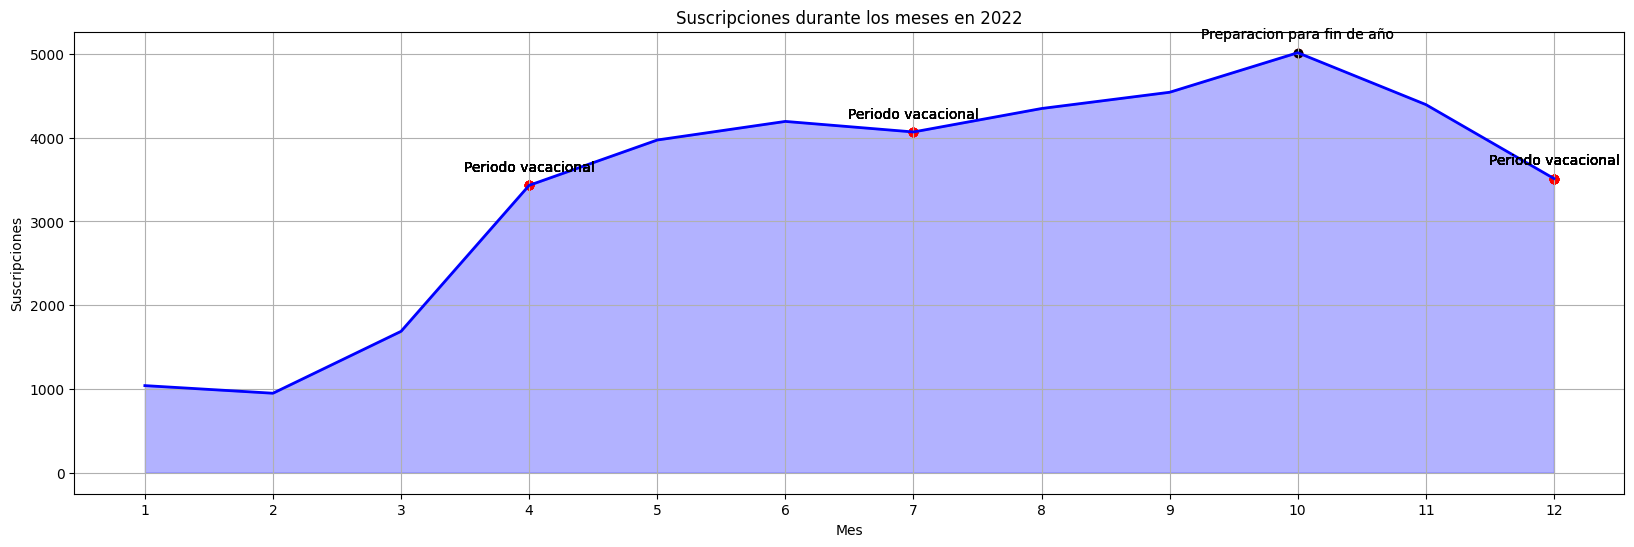

In [ ]:
month_dec_counts = df['Month_Dec'].value_counts().reset_index()
month_dec_counts.columns = ['Month_Dec', 'Subscriptions']
var = month_dec_counts.sort_values(by='Month_Dec')
plt.figure(figsize=(20, 6))
plt.plot(var['Month_Dec'], var['Subscriptions'], color='blue', linewidth=2)
plt.fill_between(var['Month_Dec'], var['Subscriptions'], color='blue', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Suscripciones')
plt.title('Suscripciones durante los meses en 2022')
plt.xticks(var['Month_Dec'])
plt.grid(True)
aux_filtered = aux[aux['Eje_y'] != 0]
special_point = aux[aux['Eje_y'] == 5014]
for index, row in aux_filtered.iterrows():
    plt.scatter(row['month'], row['Eje_y'], color='red')
    plt.annotate(row['festivity'], (row['month'], row['Eje_y']), textcoords="offset points", xytext=(0,10), ha='center')
plt.scatter(special_point['month'], special_point['Eje_y'], color='black')
plt.annotate('Preparacion para fin de año', (special_point.iloc[0]['month'], special_point.iloc[0]['Eje_y']), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

*   Primer trimestre: 1 de enero hasta el 31 de marzo.
*   Segundo trimestre: 1 de abril hasta el 30 de junio.
*   Tercer trimestre: 1 de julio al 30 de septiembre.
*   Cuarto trimestre: 1 de octubre al 31 de diciembre.

Como se muestra en la Line Chart, los trimestres donde mas Suscripciones nuevas ha habido son el **segundo** y el **cuarto**.

Para ser mas especifico, los meses con suscripciones nuevas mas elevados son Junio y Octubre, esto puede deberse a mil cosas, sin embargo una de las razones podria ser que tambien estas fechas son las vacaciones de **Verano** y de **Fin de Año/Navidad**, lo que podria significar que algunos usuarios nuevos buscan algun tipo de credito o ayuda bancaria para poder solventar sus gastos de viaje.

##Pregunta 2

¿Qué rango de edad muestra la mayor oportunidad de crecimiento? ¿Existe algún rango de edad que presente
preocupaciones?

In [ ]:
#Se hace una grafica para ver la distribucion de edades
#Se dividira en grupos edades
def assign_sector(age):
    if 28 <= age <= 30:
        return "28 - 30"
    elif 31 <= age <= 35:
        return "31 - 35"
    elif 36 <= age <= 40:
        return "36 - 40"
    elif 41 <= age <= 45:
        return "41 - 45"
    elif 46 <= age <= 50:
        return "46 - 50"
    elif 51 <= age <= 55:
        return "51 - 55"
    elif 56 <= age <= 60:
        return "56 - 60"
    elif 61 <= age <= 65:
        return "61 - 65"
    elif 66 <= age <= 70:
        return "66 - 70"
    elif 71 <= age <= 75:
        return "71 - 75"
    elif 76 <= age <= 80:
        return "76 - 80"
    elif 81 <= age <= 85:
        return "81 - 85"
    elif 86 <= age <= 90:
        return "86 - 90"
    elif 91 <= age <= 95:
        return "91 - 95"
    elif 96 <= age <= 100:
        return "96 - 100"
    elif 101 <= age <= 103:
        return "101 - 103"
    else:
        return "Other"

df['Sector_Age'] = df['Age'].apply(assign_sector)

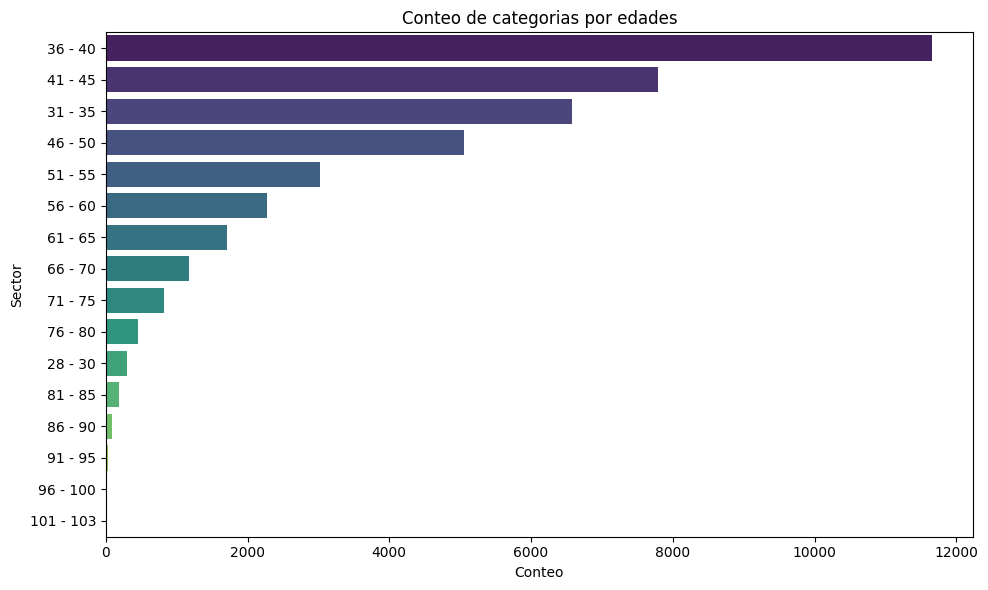

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Sector_Age', order=df['Sector_Age'].value_counts().index, palette='viridis')
plt.xlabel('Conteo')
plt.ylabel('Sector')
plt.title('Conteo de categorias por edades')
plt.tight_layout()
plt.show()

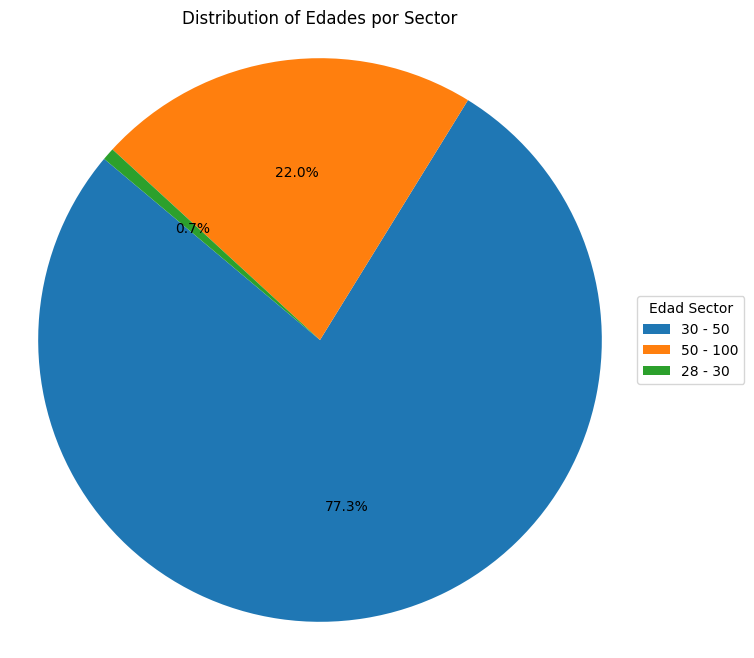

In [ ]:
df['Sector_Age_N'] = pd.cut(df['Age'], bins=[0, 30, 51, df['Age'].max()], labels=['28 - 30', '30 - 50', '50 - 100'])
sector_age_counts = df['Sector_Age_N'].value_counts()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
legend_labels = sector_age_counts.index
plt.figure(figsize=(8, 8))
plt.pie(sector_age_counts.values, labels=None, colors=colors, startangle=140, autopct='%1.1f%%')
plt.title('Distribution of Edades por Sector')
plt.axis('equal')
plt.legend(title='Edad Sector', labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
#Datos de la INEGI
aux = pd.read_csv('/content/drive/MyDrive/Yael/DEV/0. Projects-Data/8. Amex-Case-Interview/DataSet/Indicadores_INEGI_2020_Edades_Poblacion.csv')

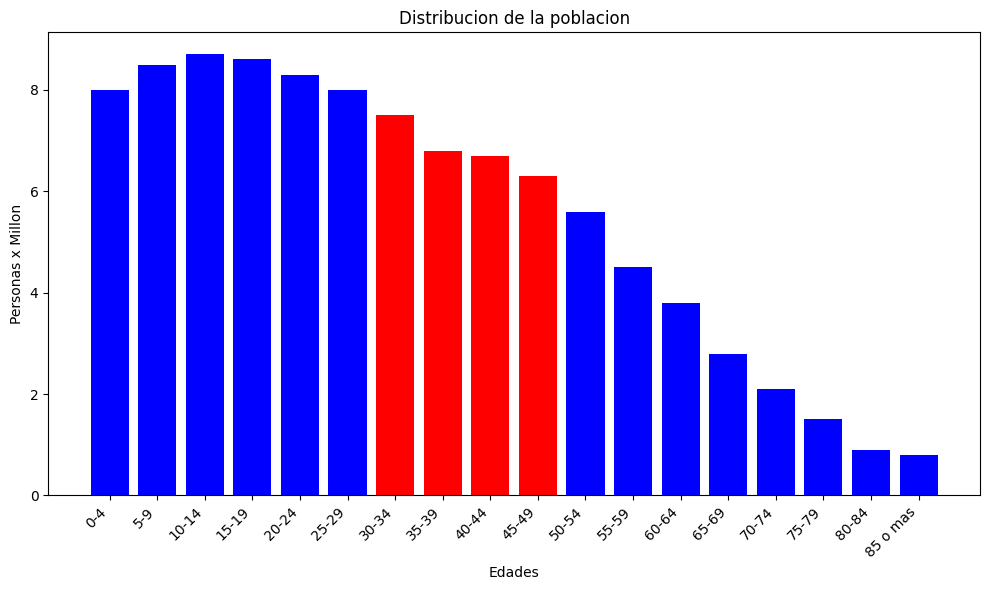

In [ ]:
colors = ['red' if value in ['30-34', '35-39', '40-44', '45-49'] else 'blue' for value in aux['Concepto']]
plt.figure(figsize=(10, 6))
plt.bar(aux['Concepto'], aux['Total'], color=colors)
plt.xlabel('Edades')
plt.ylabel('Personas x Millon')
plt.title('Distribucion de la poblacion')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Como se observa, el grupo predominante es el de "36 a 40"

Por lo tanto de momento podria decirse que es el grupo predominante para el estudio, es decir que la campaña deberia centrarse en ellos.

Algo preocupante que se logra ver es que la distribucion de edades esta muy centrada en la poblacion de 30 a 50 años. Lo que indica que la gente que es menor, los jovenes no estan alcanzando un buen score para poder tener una tarjeta AMEX o por el contrario que sus salarios no dan para esto.

Por otra parte, la poblacion de adultos mayores a 50 años se sesga completamente, esto puede traducirse en una falta de empleo.

##Pregunta 3

¿Qué estado muestra la mayor oportunidad de crecimiento? ¿Existe algún estado que presente preocupaciones?

In [ ]:
state_counts = df['State'].value_counts()

def assign_sector_state(count):
    if count > 0 and count < 501:
        return "Low"
    elif count >= 501 and count < 2000:
        return "Average"
    elif count >= 2000:
        return "High"
    else:
        return "Other"

df['Sector_State'] = df['State'].map(state_counts).apply(assign_sector_state)

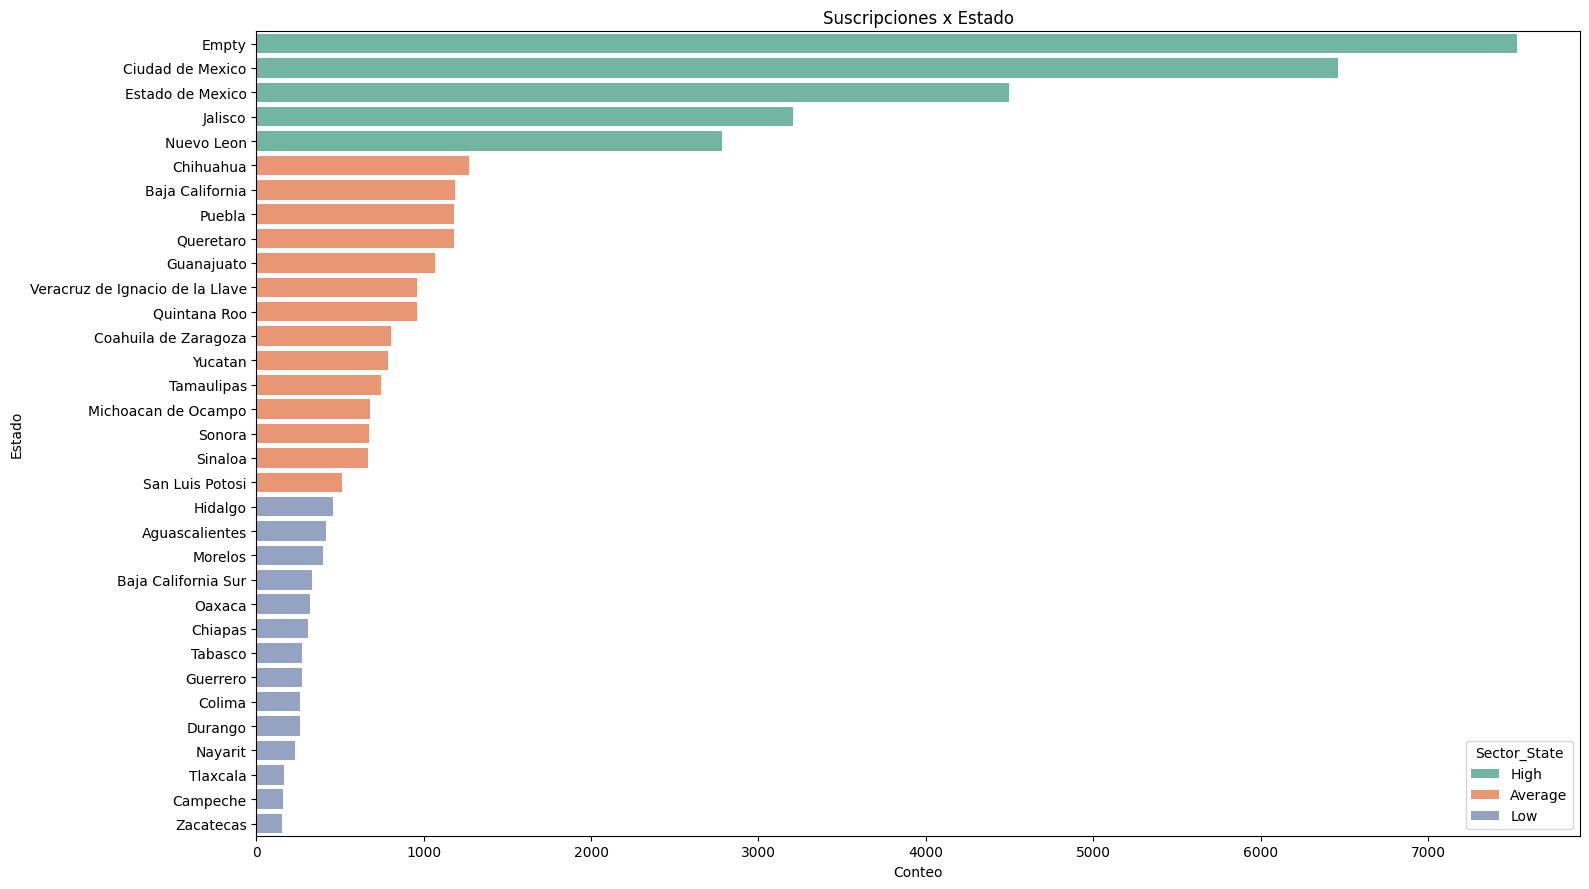

In [ ]:
sector_state_counts = df['Sector_State'].value_counts()
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
plt.figure(figsize=(16, 9))
sns.countplot(data=df, y='State', palette=colors, hue='Sector_State', order=df['State'].value_counts().index[::-1], dodge=False)

for patch in plt.gca().patches:
    current_width = patch.get_width()
    new_width = current_width * 1
    patch.set_width(new_width)
    patch.set_x(patch.get_x() - (new_width - current_width) / 2)

plt.ylim(-0.5, len(df['State'].unique()) - 0.5)
plt.xlabel('Conteo')
plt.ylabel('Estado')
plt.title('Suscripciones x Estado')
plt.legend(title='Sector_State', labels=['High', 'Average', 'Low'])
plt.tight_layout()
plt.show()

In [ ]:
aux = pd.read_csv('/content/drive/MyDrive/Yael/DEV/0. Projects-Data/8. Amex-Case-Interview/DataSet/Distribucion_Valor_Empresas_Negocios_INEGI_2022.csv')

In [ ]:
min_value = aux['Distribution_Business'].min()
max_value = aux['Distribution_Business'].max()

def assign_business_category(count):
    if count < min_value + (max_value - min_value) * 0.2:
        return "Low"
    elif count < min_value + (max_value - min_value) * 0.5:
        return "Average"
    else:
        return "High"

aux['Business_Category'] = aux['Distribution_Business'].apply(assign_business_category)

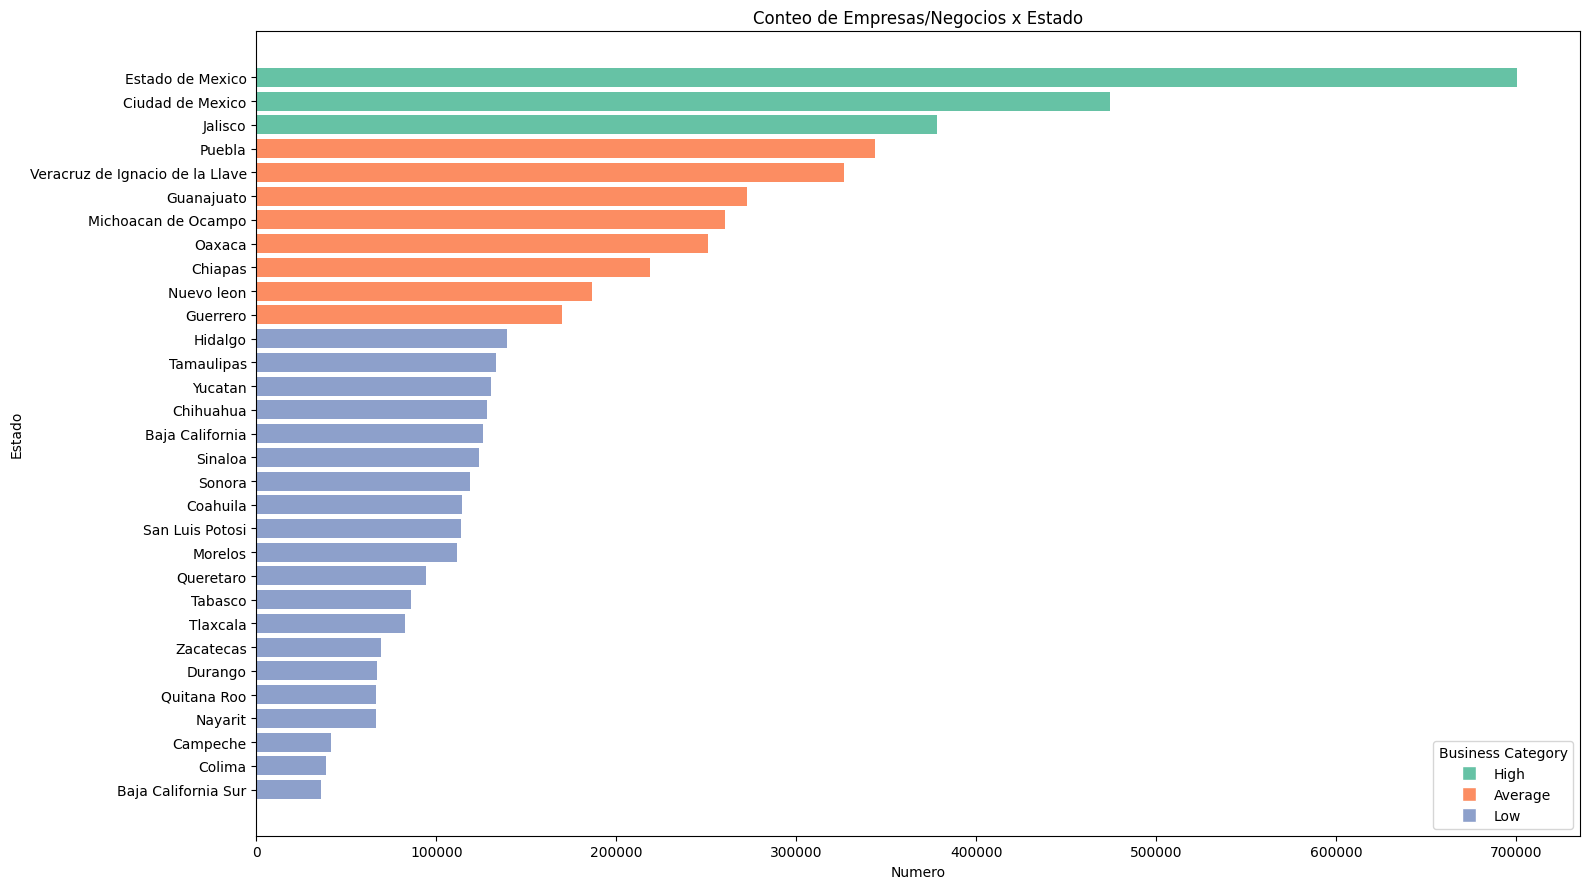

In [ ]:
aux_sorted = aux.sort_values(by='Distribution_Business', ascending=True)
colors = {'Low': '#8da0cb', 'Average': '#fc8d62', 'High': '#66c2a5'}
plt.figure(figsize=(16, 9))
plt.barh(aux_sorted['State'], aux_sorted['Distribution_Business'], color=aux_sorted['Business_Category'].map(colors))
plt.xlabel('Numero')
plt.ylabel('Estado')
plt.title('Conteo de Empresas/Negocios x Estado')
plt.tight_layout()
colors = {'High': '#66c2a5', 'Average': '#fc8d62', 'Low': '#8da0cb'}
legend_labels = [plt.Line2D([0], [0], marker='s', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in colors.items()]
plt.legend(handles=legend_labels, title='Business Category')
plt.show()

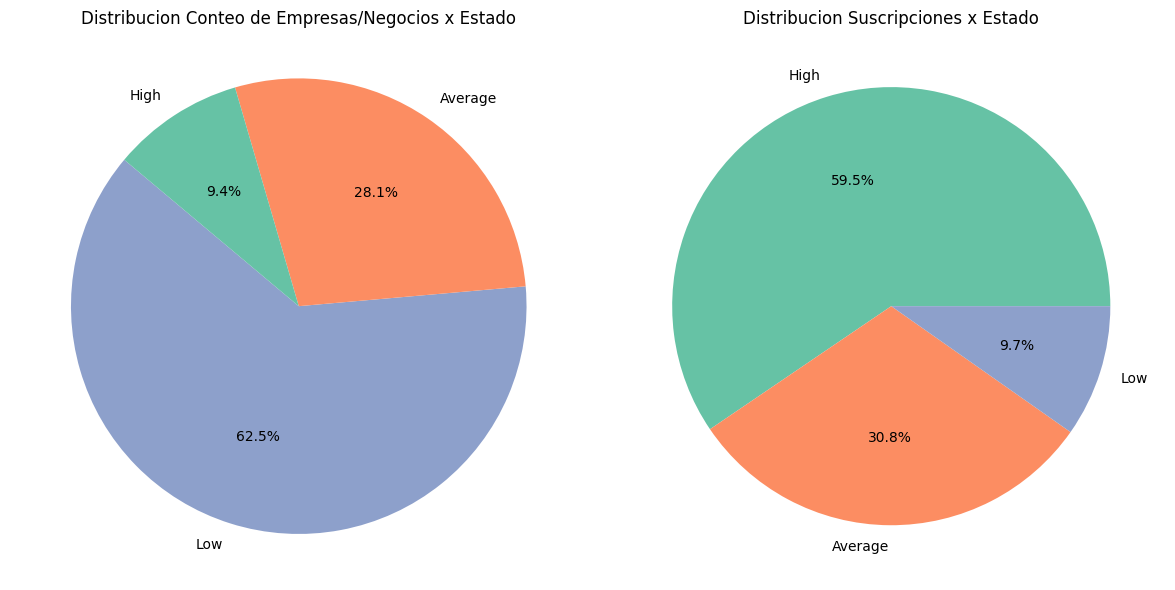

In [ ]:
colors_piechart1 = ['#8da0cb', '#fc8d62', '#66c2a5']
colors_piechart2 = ['#66c2a5', '#fc8d62', '#8da0cb']
business_category_counts = aux['Business_Category'].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(business_category_counts, labels=business_category_counts.index, colors=colors_piechart1, autopct='%1.1f%%', startangle=140)
plt.title('Distribucion Conteo de Empresas/Negocios x Estado')
plt.axis('equal')
sector_state_counts = df['Sector_State'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(sector_state_counts, labels=sector_state_counts.index, autopct='%1.1f%%', colors=colors_piechart2)
plt.title('Distribucion Suscripciones x Estado')
plt.tight_layout()
plt.show()

Para poder entender un poco mejor nuestra grafica, tendremos que segmentar a la poblacion.

Esto sera con el fin de identificar a nuestro tarjet:

Como se puede observar existen tres sectores


*   Los cinco primeros estados representan a los estados que mas generan dinero para AMEX (CDMX, Edo. Mex, Jalisco, Nuevo Leon, Vacio)
*   Los estados intermedios representan a aquellos donde no hay una gran cantidad de usuarios pero en conjunto sigue formando parte importante de los suscriptores de AMEX  
*   Los estados finales representan aquellos donde hay pocos suscriptores


Esto es muy importante ya que el primer y segundo sector representan a los clientes mas grandes y al que genera mas ingreso para AMEX.

Por otra parte, algo preocupante es que gran parte de los registros no tienen registrado un Estado, lo que podria traducirse en que el survey utilizado para registrar a cada cliente (pagina web, sistema de captura, personal, etc) no esta trabajando adecuadamente, esto es muy importante y deberia ser corregido los antes posible, ya que de continuar asi con el tiempo no se podria tener un control y se cezgaria nuestra base de datos.


Finalmente, los estados que son los clientes mas grandes para AMEX tambien son los estados con mayor economia en Mexico. Algo importante a destacar es que **Nuevo Leon** a pesar de formar parte del sector de clientes grandes para AMEX podria crecer mas.

Esto podria suceder debido a los proyectos que estan por hacerse en Mexico como algunas empresas que empezaran (eg. Tesla), por lo tanto podria hacerse algun tipo de campaña para atrapar a los nuevos trabajadores que llegaran de otras Ciudades/Estados, se podria pensar en algun tipo de CashBack en viajes de avion y despensas.




##Pregunta 4

Basándose en los datos, ¿qué estrategia sugeriría para mejorar la adquisición?

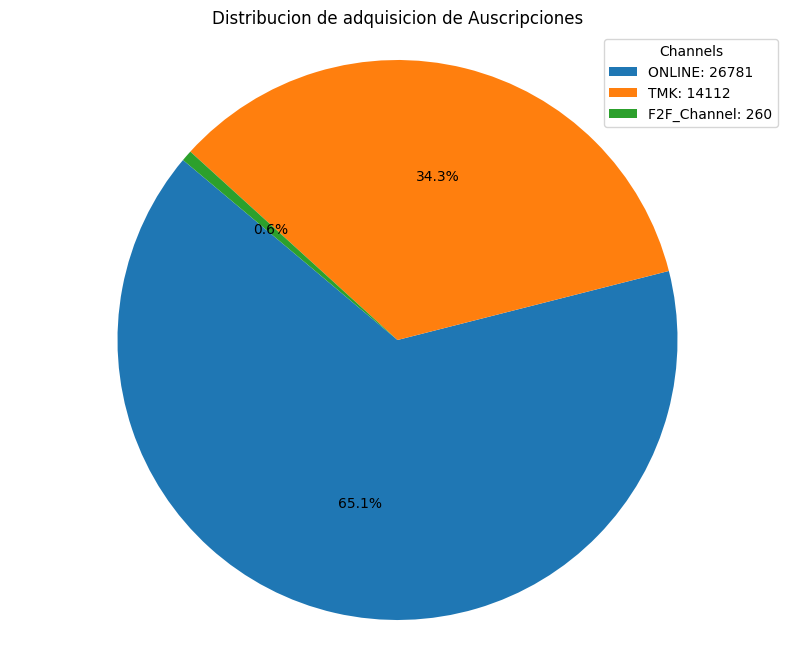

In [ ]:
channel_counts = df['Channel'].value_counts()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.figure(figsize=(10, 8))
plt.pie(channel_counts, labels=None, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribucion de adquisicion de Auscripciones')
plt.axis('equal')
descriptions = ["Description for Channel A", "Description for Channel B", "Description for Channel C"]
legend_labels = [f'{label}: {count}' for label, count, percentage, description in zip(channel_counts.index, channel_counts, channel_counts / channel_counts.sum(), descriptions)]
plt.legend(title="Channels", labels=legend_labels, loc='best')
plt.show()

La recomendacion que yo haria seria incrementar las herramientas WEB, ya que la adquisicion de forma ONLINE es la que mas tiene solicitudes/aprobaciones.

Por ende yo recomendaria hacer un bot/asistente AI que ayude en las solicitudes de tarjetas dentro de la pagina web, de modo que la persona que esta detras de la computadora se sienta entendida y que ademas los datos ingresados tengan una mayor confiabilidad

##Pregunta 5

¿Cómo se correlacionan el ingreso mensual y el gasto?

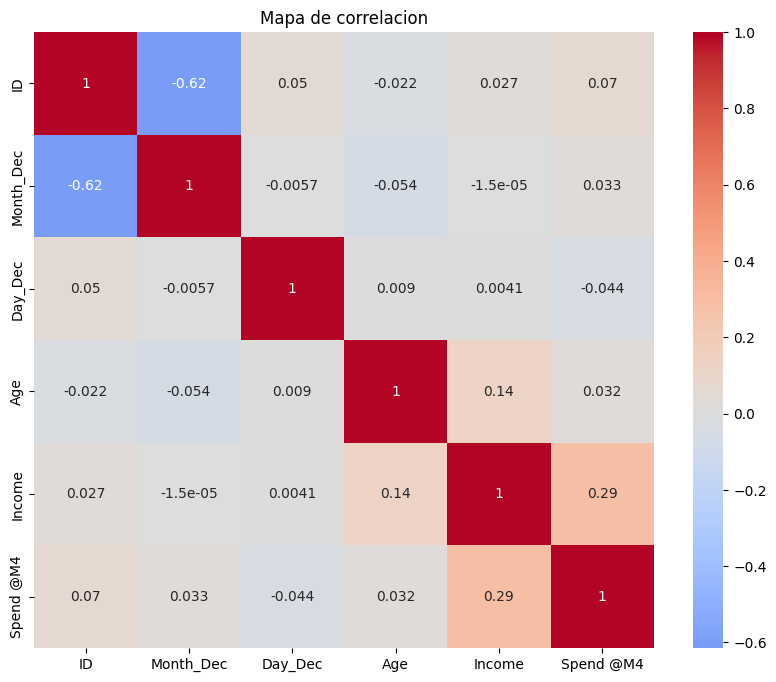

In [ ]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical_columns = numerical_columns.drop(['Year_Dec', 'Flag_Approved'])
correlation = df[numerical_columns].corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de correlacion')
plt.show()

In [ ]:
#Calculamos el Income para el mes 10
df['Income_@M4'] = df['Income'] * 10

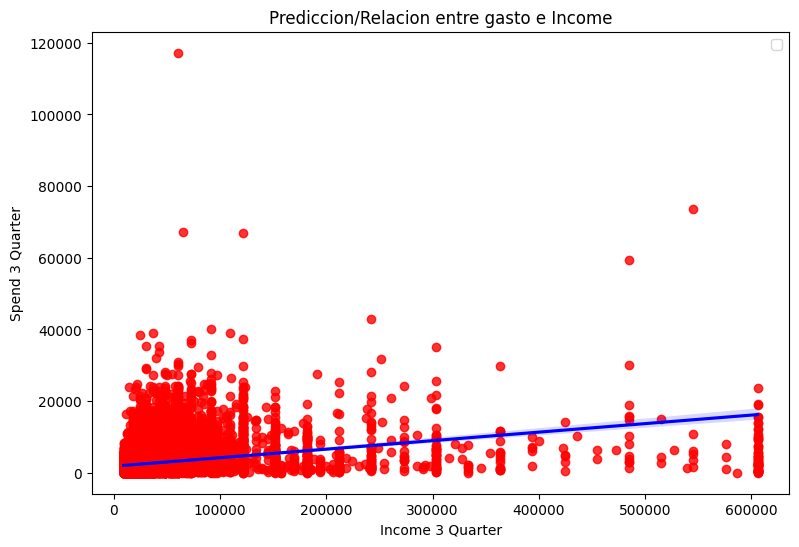

In [ ]:
plt.figure(figsize=(9, 6))
sns.regplot(x='Income_@M4', y='Spend @M4', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.xlabel('Income 3 Quarter')
plt.ylabel('Spend 3 Quarter')
plt.title('Prediccion/Relacion entre gasto e Income')
plt.legend()
plt.show()

Como vemos en la grafica anterior, si existe una relacion entre el gasto de tarjeta con el salario de cada cliente, por lo general entre mayor sea su ingreso tambien sera mayor su gasto

Esta grafica es una regresion lineal, se usa para ver el comportamiento de dos variables y su relacion de crecimiento/decremiento

In [ ]:
df['Income_@M4-Spend @M4'] = df['Income_@M4'] - df['Spend @M4']

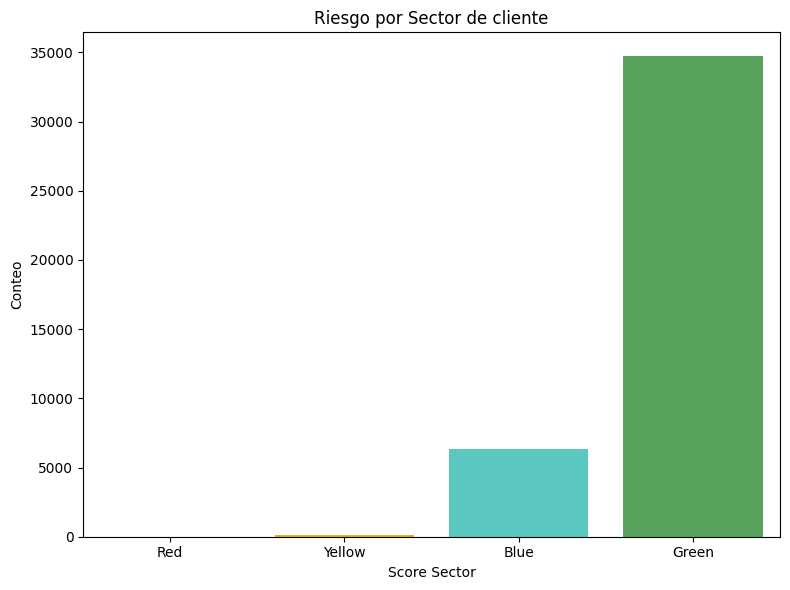

In [ ]:
conditions = [
    df['Income_@M4-Spend @M4'] <= 0,
    (df['Income_@M4-Spend @M4'] > 0) & (df['Income_@M4-Spend @M4'] < 5000),
    (df['Income_@M4-Spend @M4'] >= 5000) & (df['Income_@M4-Spend @M4'] < 10000),
    df['Income_@M4-Spend @M4'] >= 10000
]

sector_labels = ['Red', 'Yellow', 'Blue', 'Green']
df['Sector_Score'] = np.select(conditions, sector_labels)
sector_counts = df['Sector_Score'].value_counts()
colors = ['#FF5733', '#FFC300', '#47DBCD', '#4CAF50']
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sector_Score', palette=colors, order=sector_labels)
plt.xlabel('Score Sector')
plt.ylabel('Conteo')
plt.title('Riesgo por Sector de cliente')
plt.tight_layout()
plt.show()

La grafica representa una segmentacion de la poblacion de clientes, esta grafica esta enfocada en mostar que tanto riesgo tiene el banco con cada cliente, se tienen cuatro segmentos:

*   Verde: Para los clientes que su ingreso es muy superior al gasto con tarjeta
*   Azul: Para los clientes que su ingreso es mayor al gasto con tarjeta pero no tanto
*   Amarillo: Para los clientes su ingreso es cercano al gasto con tarjeta
*   Rojo: Para los clientes su ingreso es menor al gasto con tarjeta


Realmente si quisieramos imprimir y vizualiar cuantas personas son un riesgo para la empresa, el numero seria minimo, lo que igual se traduce en que los analistas de AMEX son muy buenos eligiendo a sus candidatos

##Pregunta 6
¿Qué segmento de clientes parece ser el más rentable para AMEX?

In [ ]:
average_spend = df['Spend @M4'].mean()
def categorize_spending(row):
    if row['Spend @M4'] > average_spend:
        return 'Alto'
    elif row['Spend @M4'] < average_spend:
        return 'Bajo'
    else:
        return 'Promedio'

df['Sector_Spend'] = df.apply(categorize_spending, axis=1)

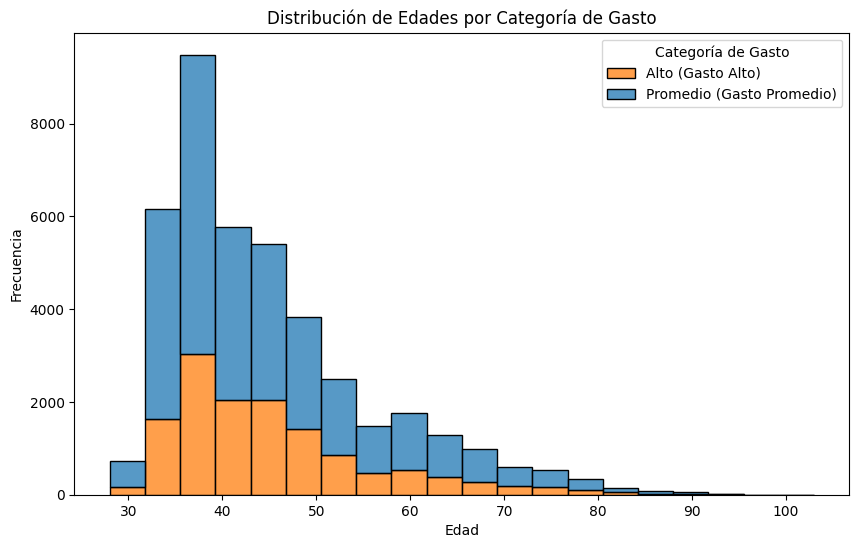

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Sector_Spend', multiple='stack', bins=20)
plt.title('Distribución de Edades por Categoría de Gasto')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría de Gasto', labels=['Alto (Gasto Alto)', 'Promedio (Gasto Promedio)', 'Bajo (Gasto Bajo)'])
plt.show()

En la grafica anterior se muestra como esta distribuida la poblacion, esta grafica se compone en dos categorias:

*   Naranja: Se trata de la poblacion que le da un uso alto y gasta bastante con su tarjeta AMEX, lo que se traduce en un **alto** ingreso para la compañia
*   Azul: Se trata de la poblacion que le da un uso promedio con su tarjeta AMEX, lo que se traduce en un ingreso **promedio** pero **constante** la compañia

In [ ]:
#Datos de la INEGI
aux = pd.read_csv('/content/drive/MyDrive/Yael/DEV/0. Projects-Data/8. Amex-Case-Interview/DataSet/Empleos_INEGI_2023.csv')

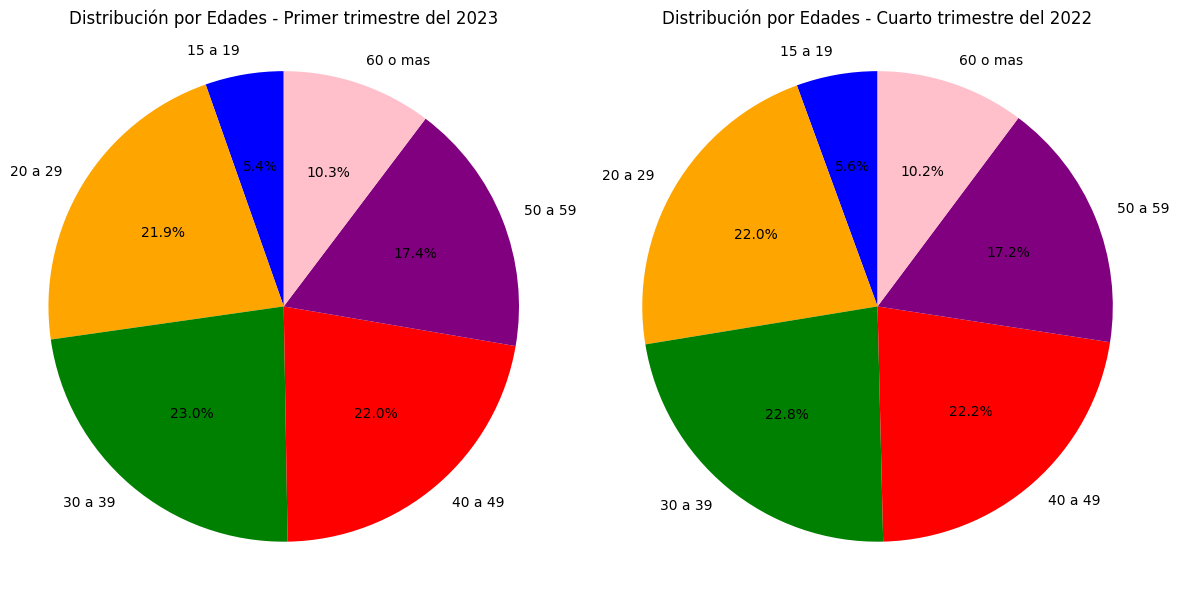

In [ ]:
periodos = aux['Periodo'].unique()

if len(periodos) > 2:
    periodos = periodos[:2]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'pink']

for i, periodo in enumerate(periodos):
    ax = axes[i]
    distribucion = aux[aux['Periodo'] == periodo][['15 a 19', '20 a 29', '30 a 39', '40 a 49', '50 a 59', '60 o mas']].iloc[0]
    ax.pie(distribucion, labels=distribucion.index, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Distribución por Edades - {periodo}')
    ax.axis('equal')

plt.tight_layout()
plt.show()

Esta grafica representa un estudio que hizo el INEGI

Se realizo un conteo de cuantas personas estaban trabajando en ese momento

##Pregunta 7

¿Qué fuentes de datos públicos eligió y cómo se relacionan con la base de datos proporcionada?

Respuesta

##Pregunta 8
¿Cómo llevó a cabo la integración de los datos? ¿Qué herramientas y metodologías utilizó?

Respuesta

##Pregunta 9

Con base en el análisis conjunto, ¿qué insights puede ofrecer sobre la adquisición de tarjetas en México y la
posición de AMEX en este contexto?

Respuesta

##Pregunta 10

¿Existe algún rango de edad o segmento que AMEX podría enfocar más o menos, según los datos públicos y la
información de AMEX?

Respuesta

##Pregunta 11

¿Qué recomendaciones estratégicas puede hacer para mejorar los procesos de adquisición de tarjetas y el
posicionamiento de AMEX en el mercado?

Respuesta

##Fuentes

1) Dias inhabiles CENACE:

https://www.gob.mx/cenace/articulos/cenace-publica-sus-dias-inhabiles-para-2022?idiom=es

2) Poblacion con empleo INEGI:


https://www.inegi.org.mx/sistemas/olap/proyectos/bd/encuestas/hogares/enoe/2010_pe_ed15/po.asp?s=est&proy=enoe_pe_ed15_po&p=enoe_pe_ed15

2) Si el primer link no funciona:

https://www.inegi.org.mx/programas/enoe/15ymas/#tabulados

3) Poblacion en Mexico INEGI:

https://www.inegi.org.mx/temas/estructura/

4) Distribucion de empresas/negocios en Mexico y aporte de Capital:

https://www.inegi.org.mx/temas/directorio/#informacion_general